# Preprocessing

In [9]:
import pandas as pd
import numpy as np

# Collect Data

In [16]:
data = pd.read_csv('https://raw.githubusercontent.com/ade-irawan/dummy-datasets/main/melb_data.csv')

In [17]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [18]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

# Data Cleansing

In [19]:
num_data = data._get_numeric_data()
print(num_data)

       Rooms      Price  Distance  Postcode  Bedroom2  Bathroom  Car  \
0          2  1480000.0       2.5    3067.0       2.0       1.0  1.0   
1          2  1035000.0       2.5    3067.0       2.0       1.0  0.0   
2          3  1465000.0       2.5    3067.0       3.0       2.0  0.0   
3          3   850000.0       2.5    3067.0       3.0       2.0  1.0   
4          4  1600000.0       2.5    3067.0       3.0       1.0  2.0   
...      ...        ...       ...       ...       ...       ...  ...   
13575      4  1245000.0      16.7    3150.0       4.0       2.0  2.0   
13576      3  1031000.0       6.8    3016.0       3.0       2.0  2.0   
13577      3  1170000.0       6.8    3016.0       3.0       2.0  4.0   
13578      4  2500000.0       6.8    3016.0       4.0       1.0  5.0   
13579      4  1285000.0       6.3    3013.0       4.0       1.0  1.0   

       Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount  
0         202.0           NaN        NaN  -37.79960   

In [20]:
print(num_data.columns)

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')


In [21]:
cat_num_var = ['Postcode']
num_data = num_data.drop(cat_num_var, axis=1)

In [22]:
cat_data = data.drop(num_data, axis= 1)

In [23]:
from sklearn.impute import SimpleImputer

# numerical imputation
num_imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
num_imputer.fit(num_data)
clean_num_data = num_imputer.transform(num_data)
clean_num_data = pd.DataFrame(clean_num_data)

In [24]:
clean_num_data.columns = num_data.columns
clean_num_data.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2.0,1480000.0,2.5,2.0,1.0,1.0,202.0,151.96765,1964.684217,-37.7996,144.9984,4019.0
1,2.0,1035000.0,2.5,2.0,1.0,0.0,156.0,79.00000,1900.000000,-37.8079,144.9934,4019.0
2,3.0,1465000.0,2.5,3.0,2.0,0.0,134.0,150.00000,1900.000000,-37.8093,144.9944,4019.0
3,3.0,850000.0,2.5,3.0,2.0,1.0,94.0,151.96765,1964.684217,-37.7969,144.9969,4019.0
4,4.0,1600000.0,2.5,3.0,1.0,2.0,120.0,142.00000,2014.000000,-37.8072,144.9941,4019.0


In [25]:
clean_num_data.isnull().sum()

Rooms            0
Price            0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Propertycount    0
dtype: int64

# Categorical Cleaning

In [26]:
cat_data

,Suburb,Address,Type,Method,SellerG,Date,Postcode,CouncilArea,Regionname
0,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,3067.0,Yarra,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,3067.0,Yarra,Northern Metropolitan
2,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,3067.0,Yarra,Northern Metropolitan
3,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,3067.0,Yarra,Northern Metropolitan
4,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,3067.0,Yarra,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,h,S,Barry,26/08/2017,3150.0,NaN,South-Eastern Metropolitan
13576,Williamstown,77 Merrett Dr,h,SP,Williams,26/08/2017,3016.0,NaN,Western Metropolitan
13577,Williamstown,83 Power St,h,S,Raine,26/08/2017,3016.0,NaN,Western Metropolitan
13578,Williamstown,96 Verdon St,h,PI,Sweeney,26/08/2017,3016.0,NaN,Western Metropolitan


In [27]:
from sklearn.impute import SimpleImputer

# categorical imputation
cat_imputer = SimpleImputer(missing_values= np.nan, strategy='most_frequent')
cat_imputer.fit(cat_data)
clean_cat_data = cat_imputer.transform(cat_data)
clean_cat_data = pd.DataFrame(clean_cat_data)
clean_cat_data.columns= cat_data.columns

In [28]:
clean_cat_data.isnull().sum()

Suburb         0
Address        0
Type           0
Method         0
SellerG        0
Date           0
Postcode       0
CouncilArea    0
Regionname     0
dtype: int64

In [29]:
set(clean_cat_data.Method)

{'PI', 'S', 'SA', 'SP', 'VB'}

# Data Preprocessing

In [30]:
from sklearn import preprocessing

In [31]:
clean_cat_data = data.drop(clean_num_data, axis=1)

In [32]:
clean_cat_data

,Suburb,Address,Type,Method,SellerG,Date,Postcode,CouncilArea,Regionname
0,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,3067.0,Yarra,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,3067.0,Yarra,Northern Metropolitan
2,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,3067.0,Yarra,Northern Metropolitan
3,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,3067.0,Yarra,Northern Metropolitan
4,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,3067.0,Yarra,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,h,S,Barry,26/08/2017,3150.0,NaN,South-Eastern Metropolitan
13576,Williamstown,77 Merrett Dr,h,SP,Williams,26/08/2017,3016.0,NaN,Western Metropolitan
13577,Williamstown,83 Power St,h,S,Raine,26/08/2017,3016.0,NaN,Western Metropolitan
13578,Williamstown,96 Verdon St,h,PI,Sweeney,26/08/2017,3016.0,NaN,Western Metropolitan


In [33]:
oh_enc = preprocessing.OneHotEncoder()
ohe_out = pd.DataFrame(oh_enc.fit_transform(clean_cat_data[['Method']]).toarray())
ohe_out.head()


,0,1,2,3,4
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [48]:
cat_data_encoded = pd.get_dummies(clean_cat_data, columns=['Type', 'Method'], prefix=['Type','Method'])
cat_data_encoded

,Suburb,Address,SellerG,Date,Postcode,CouncilArea,Regionname,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
0,Abbotsford,85 Turner St,Biggin,3/12/2016,3067.0,Yarra,Northern Metropolitan,1,0,0,0,1,0,0,0
1,Abbotsford,25 Bloomburg St,Biggin,4/02/2016,3067.0,Yarra,Northern Metropolitan,1,0,0,0,1,0,0,0
2,Abbotsford,5 Charles St,Biggin,4/03/2017,3067.0,Yarra,Northern Metropolitan,1,0,0,0,0,0,1,0
3,Abbotsford,40 Federation La,Biggin,4/03/2017,3067.0,Yarra,Northern Metropolitan,1,0,0,1,0,0,0,0
4,Abbotsford,55a Park St,Nelson,4/06/2016,3067.0,Yarra,Northern Metropolitan,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,Barry,26/08/2017,3150.0,NaN,South-Eastern Metropolitan,1,0,0,0,1,0,0,0
13576,Williamstown,77 Merrett Dr,Williams,26/08/2017,3016.0,NaN,Western Metropolitan,1,0,0,0,0,0,1,0
13577,Williamstown,83 Power St,Raine,26/08/2017,3016.0,NaN,Western Metropolitan,1,0,0,0,1,0,0,0
13578,Williamstown,96 Verdon St,Sweeney,26/08/2017,3016.0,NaN,Western Metropolitan,1,0,0,1,0,0,0,0


In [ ]:
output_data = clean_num_data['Price']
input_data = clean_num_data.drop('Price', axis=1)

In [ ]:
input_data.columns

Index(['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

In [ ]:
type(input_data)

pandas.core.frame.DataFrame

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(input_data,
                                                    output_data,
                                                    test_size= 0.2,
                                                    random_state= 0)

In [ ]:
X_train.shape, X_test.shape

((10864, 11), (2716, 11))

In [ ]:
y_train.shape, y_test.shape

((10864,), (2716,))

# Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

# Evaluate

In [ ]:
# training

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_predicted= model.predict(X_train)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_train, y_train_predicted)

299275.1656627462

In [ ]:
np.mean(np.abs(y_train - y_train_predicted))

299275.1656627462

In [ ]:
# testing

y_test_predicted = model.predict(X_test)

In [ ]:
np.sum(np.abs(y_test - y_test_predicted))

808364220.2809434

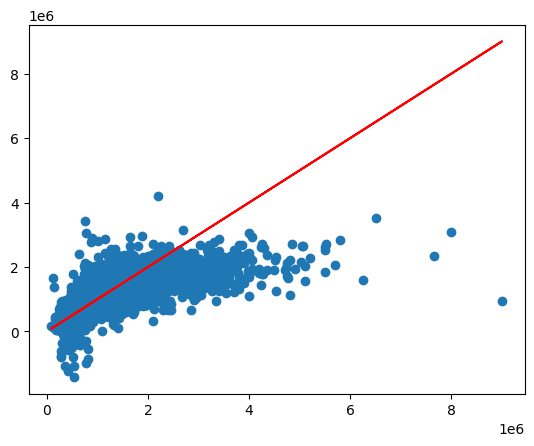

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_train, y_train_predicted)
plt.plot(y_train, y_train, 'r-')

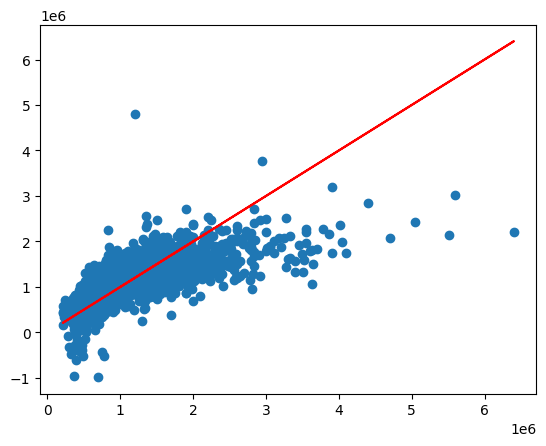

In [ ]:
plt.scatter(y_test, y_test_predicted)
plt.plot(y_test, y_test, 'r-')

In [ ]:
cat_data

,Suburb,Address,Type,Method,SellerG,Date,Postcode,CouncilArea,Regionname
0,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,3067.0,Yarra,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,3067.0,Yarra,Northern Metropolitan
2,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,3067.0,Yarra,Northern Metropolitan
3,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,3067.0,Yarra,Northern Metropolitan
4,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,3067.0,Yarra,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,h,S,Barry,26/08/2017,3150.0,NaN,South-Eastern Metropolitan
13576,Williamstown,77 Merrett Dr,h,SP,Williams,26/08/2017,3016.0,NaN,Western Metropolitan
13577,Williamstown,83 Power St,h,S,Raine,26/08/2017,3016.0,NaN,Western Metropolitan
13578,Williamstown,96 Verdon St,h,PI,Sweeney,26/08/2017,3016.0,NaN,Western Metropolitan


In [ ]:
cat_data['Address']


0            85 Turner St
1         25 Bloomburg St
2            5 Charles St
3        40 Federation La
4             55a Park St
               ...       
13575        12 Strada Cr
13576       77 Merrett Dr
13577         83 Power St
13578        96 Verdon St
13579          6 Agnes St
Name: Address, Length: 13580, dtype: object